In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [51]:
mi_pipe = make_pipeline(
    StandardScaler(),
    PCA()
)

In [52]:
df_iris =  pd.read_csv('iris.csv')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
Nombres_iris = pd.DataFrame(df_iris.iloc[:,4])
Datos_iris = pd.DataFrame(df_iris.iloc[:, 0:4])

In [54]:
Nombres_iris

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [55]:
Datos_iris

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
Columnas_iris = Datos_iris.columns
Columnas_iris

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [57]:
mi_pipe.fit(Datos_iris)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [58]:
mi_pipe.named_steps

{'standardscaler': StandardScaler(), 'pca': PCA()}

In [59]:
modelo_pca = mi_pipe.named_steps['pca']
modelo_scaler = mi_pipe.named_steps['pca']

In [62]:
datos_iris_escalados = pd.DataFrame(modelo_scaler.fit_transform(Datos_iris), columns = Datos_iris.columns)
datos_iris_escalados

,sepal.length,sepal.width,petal.length,petal.width
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [63]:
print('Porcentaje de variaza explicada por componente')

for index, componente in enumerate(modelo_pca.explained_variance_ratio_):
    print(f'Componente {index + 1}: % {componente * 100:.2f}')

Porcentaje de variaza explicada por componente
Componente 1: % 92.46
Componente 2: % 5.31
Componente 3: % 1.71
Componente 4: % 0.52


## Esto nos muestra que de los cuatro componentes los más importantes son el 1 y el 2, ya si quisieramos añadir el tres ya sería cuestión de preferencia o revisar si hay un cambio significativo si usamos estos datos, pero en este caso con los 2 primeros es suficiente.

In [64]:
print('Eigenvectores en columnas:')
eigen_vectores_filas = pd.DataFrame(data = modelo_pca.components_,
                              columns =  Columnas_iris,
                              index = ['PC1', 'PC2', 'PC3', 'PC4']
                             )
eigen_vectores_columnas =  eigen_vectores_filas.transpose()
eigen_vectores_columnas

Eigenvectores en columnas:


,PC1,PC2,PC3,PC4
sepal.length,0.361387,0.656589,-0.582030,0.315487
sepal.width,-0.084523,0.730161,0.597911,-0.319723
petal.length,0.856671,-0.173373,0.076236,-0.479839
petal.width,0.358289,-0.075481,0.545831,0.753657


In [65]:
datos_iris_escalados.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259


### Covarianza poblacion completa

In [77]:
datos_iris_cov2 = 1/(Datos_iris.shape[0]) * np.dot(datos_iris_escalados.T, datos_iris_escalados)

pd.DataFrame(datos_iris_cov2.round(14))

,0,1,2,3
0,4.200053e+00,1.000000e-14,0.000000,-0.000000
1,1.000000e-14,2.410529e-01,-0.000000,0.000000
2,0.000000e+00,-0.000000e+00,0.077688,-0.000000
3,-0.000000e+00,0.000000e+00,-0.000000,0.023676


### Covarianza poblacion no completa 

In [78]:
datos_iris_cov = datos_iris_escalados.cov()
datos_iris_cov.round(14)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,4.228242e+00,1.000000e-14,0.00000,-0.000000
sepal.width,1.000000e-14,2.426707e-01,-0.00000,0.000000
petal.length,0.000000e+00,-0.000000e+00,0.07821,-0.000000
petal.width,-0.000000e+00,0.000000e+00,-0.00000,0.023835


Usar 1/𝑁:

Esto se utiliza cuando estás calculando para la población completa.

Asumes que tienes acceso a todos los datos posibles y que no necesitas ajustar el cálculo por el tamaño de la muestra.

Usar 1/(𝑁−1):

Esto se usa cuando trabajas con una muestra de datos y no con la población completa.

El ajuste de 𝑁−1(conocido como "grados de libertad") corrige la estimación para evitar subestimar la varianza o covarianza en muestras pequeñas.

In [80]:
# Calcular eigenvalores y eigenvectores
eigenvalores, eigenvectores = LA.eig(datos_iris_cov)

print("Eigenvalores:", eigenvalores)
print("Eigenvectores:\n", eigenvectores)

Eigenvalores: [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectores:
 [[-1.00000000e+00  1.53750493e-15  6.60724351e-16  2.14793864e-16]
 [-1.53343154e-15 -1.00000000e+00 -1.05916998e-14 -8.82161852e-15]
 [-6.60623875e-16  1.04402659e-14 -1.00000000e+00  7.56324609e-14]
 [ 2.14793784e-16 -8.71755564e-15  7.56347436e-14  1.00000000e+00]]


## Proyecciones

In [81]:
proyecciones = np.dot(modelo_pca.components_, modelo_scaler.fit_transform(Datos_iris).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.T
proyecciones

,PC1,PC2,PC3,PC4
0,-1.020106,-1.524486,1.752319,-0.933826
1,-1.110712,-1.882300,1.511887,-0.624065
2,-1.009302,-2.007326,1.607076,-0.858636
3,-0.965269,-2.034738,1.368711,-0.836455
4,-0.958520,-1.564055,1.756995,-1.054738
...,...,...,...,...
145,0.991763,1.350410,-0.773215,0.789262
146,0.570331,0.730612,-0.983714,0.851996
147,0.791811,1.183066,-0.895024,0.572057
148,1.312683,1.204536,-0.957192,0.248999


In [82]:
proyecciones_completa = pd.concat([proyecciones, Nombres_iris], axis = 1)
proyecciones_completa

,PC1,PC2,PC3,PC4,variety
0,-1.020106,-1.524486,1.752319,-0.933826,Setosa
1,-1.110712,-1.882300,1.511887,-0.624065,Setosa
2,-1.009302,-2.007326,1.607076,-0.858636,Setosa
3,-0.965269,-2.034738,1.368711,-0.836455,Setosa
4,-0.958520,-1.564055,1.756995,-1.054738,Setosa
...,...,...,...,...,...
145,0.991763,1.350410,-0.773215,0.789262,Virginica
146,0.570331,0.730612,-0.983714,0.851996,Virginica
147,0.791811,1.183066,-0.895024,0.572057,Virginica
148,1.312683,1.204536,-0.957192,0.248999,Virginica


### El primer valor aporta 92% podria ser suficiente, pero utilizamos el otro 5.3 % del componente 2 para poder hacer la grafica de dispersión.

In [89]:
x = proyecciones_completa.iloc[:, 0].to_numpy()
y = proyecciones_completa.iloc[:, 1].to_numpy()
z = proyecciones_completa.variety

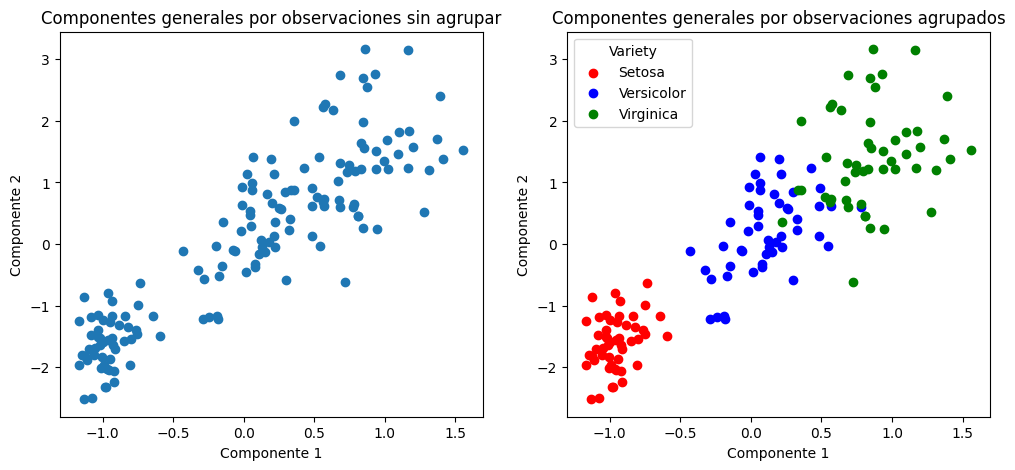

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x, y)
ax[0].set_title('Componentes generales por observaciones sin agrupar')
ax[0].set_xlabel('Componente 1')
ax[0].set_ylabel('Componente 2')

# Crear un mapa de colores para los grupos
colores = {'Setosa': 'red', 'Versicolor': 'blue', 'Virginica': 'green'}  # Ajusta los colores si quieres

# Graficar puntos para cada grupo
for grupo in colores:
    subset = proyecciones_completa[z == grupo]  # Filtrar por grupo
    ax[1].scatter(subset.iloc[:, 0], subset.iloc[:, 1], 
               label=grupo, c=colores[grupo])
    
ax[1].set_title('Componentes generales por observaciones agrupados')
ax[1].set_xlabel('Componente 1')
ax[1].set_ylabel('Componente 2')

# Añadir leyenda
ax[1].legend(title='Variety')

# Mostrar la gráfica
plt.show()

In [85]:
eigen_vectores_columnas

,PC1,PC2,PC3,PC4
sepal.length,0.361387,0.656589,-0.582030,0.315487
sepal.width,-0.084523,0.730161,0.597911,-0.319723
petal.length,0.856671,-0.173373,0.076236,-0.479839
petal.width,0.358289,-0.075481,0.545831,0.753657


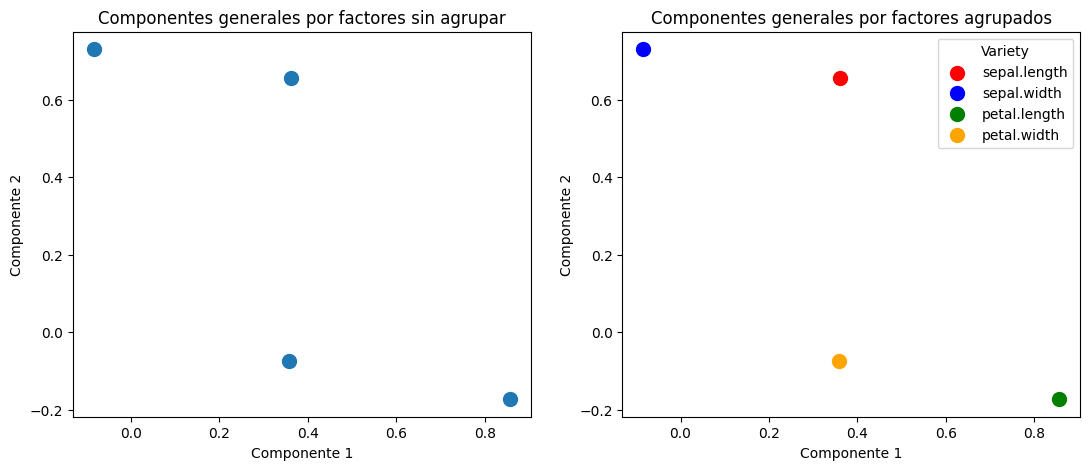

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].scatter(eigen_vectores_columnas.iloc[:, 0], eigen_vectores_columnas.iloc[:, 1], s=100)
ax[0].set_title('Componentes generales por factores sin agrupar')
ax[0].set_xlabel('Componente 1')
ax[0].set_ylabel('Componente 2')

grupos = pd.DataFrame()

# Crear un mapa de colores para los grupos
colores = {Columnas_iris[0]: 'red', Columnas_iris[1]: 'blue', Columnas_iris[2]: 'green', Columnas_iris[3]:'orange'}  # Ajusta los colores si quieres

# Graficar puntos para cada grupo
for grupo in colores.keys():
    subset = eigen_vectores_columnas[eigen_vectores_columnas.index == grupo]  # Filtrar por grupo
    ax[1].scatter(subset.iloc[:, 0], subset.iloc[:, 1], 
               label=grupo, c=colores[grupo], s=100)
    
ax[1].set_title('Componentes generales por factores agrupados')
ax[1].set_xlabel('Componente 1')
ax[1].set_ylabel('Componente 2')

# Añadir leyenda
ax[1].legend(title='Variety')

plt.savefig('Componentes por factor.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()



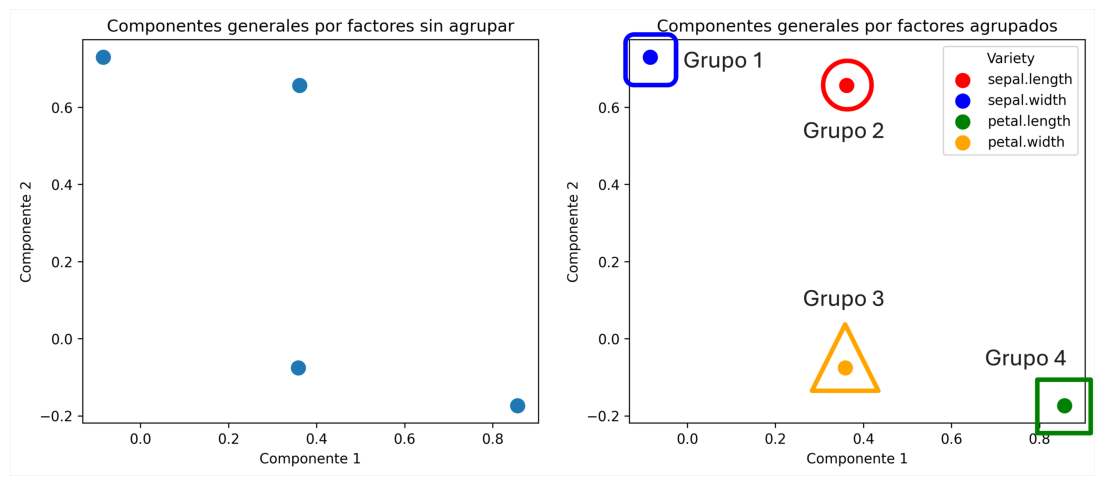

In [88]:
import matplotlib.image as mpimg


plt.figure(figsize=(14, 8))

plt.imshow(mpimg.imread('Componentes por factor agrupados.png'))
plt.axis('off')  # Quitar los ejes
plt.show()


### Finalmente podemos observar con los componentes principales 1 y 2, que se pueden distinguir 4 grupos distintos, ahora si que cada uno con su respectiva caracteristica física.